# Deep Learning

## HW1- Problem 3 - Regression (100 pts)

### Please fill this part


1.   Full Name: مرتضی غفورزاده
2.   Student Number: ۴۰۱۳۰۰۷۸۵


*You are just allowded to change those parts that start with "TO DO". Please do not change other parts.*

*It is highly recommended to read each codeline carefully and try to understand what it exactly does. Best of luck and have fun!*

In [1]:
# You are not allowed to import other packages.

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

### Part1:
Consider the dataset which has been given to you. Split the dataset into the `training dataset` and `test dataset`. You can use `80%` of the data for training and the rest for testing.

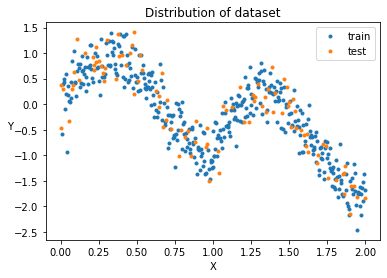

In [2]:
dataset = pd.read_csv("./data/data01.csv")

# implement the split part
# name them: x_train, x_test, y_train, y_test

# Turn pandas dataframe to numpy array type
dataset = dataset.to_numpy()

# Splitting data into train and test part. 80% for train and 20% for test
train = dataset[(dataset[:,0]%5)!=0]
test = dataset[(dataset[:,0]%5)==0]


x_train = train[:,1]
y_train = train[:,2]

x_test = test[:,1]
y_test = test[:,2]

#plt.scatter(dataset['X'],dataset['Y'])
plt.plot(x_train,y_train,'.',x_test,y_test,'.')
plt.legend(['train','test'])
plt.xlabel('X')
plt.ylabel('Y',rotation=0)
plt.title('Distribution of dataset')
plt.show()

### Part2:
Assume there is simple linear relationship between X and Y. Train a simple `Linear Regression` on the training dataset and report its accuracy on the training and testing dataset, separately.

In [3]:
# here you can implement via sgd or use least square solution. we suggest the second one inv(A^T A) * A^T y.
# consider m as the returned line --> m[0] = the slope , m[1] = y intercept, also don't forget to use numpy for calculating m.

X=np.hstack((np.reshape(x_train,(x_train.shape[0],1)),np.ones((x_train.shape[0],1))))
Y=y_train

# Computing least square solution.
m=np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot(X.T,Y))


print('''LSS in Linear regression results in:
Intercept={} and Slope={}'''.format(m[1],m[0]))

LSS in Linear regression results in:
Intercept=0.8118309051860572 and Slope=-1.0270771384808144


In [4]:
predicted_train_y = m[0] * x_train + m[1]
predicted_test_y = m[0] * x_test + m[1]

train_error = mean_squared_error(y_train,predicted_train_y)
test_error = mean_squared_error(y_test,predicted_test_y)

print(f"MSE train error: {train_error}\nMSE test error: {test_error}")

MSE train error: 0.3273700054476052
MSE test error: 0.34417614632823523


### Part3:
Draw the line you've found in the last part, on train and test points (each separately).

Text(0.5, 1.0, 'Train dataset')

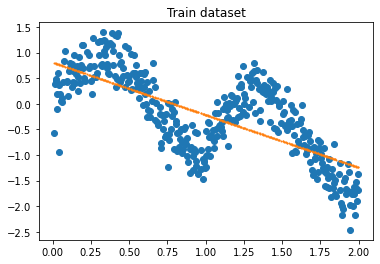

In [5]:
plt.scatter(x_train, y_train)
plt.scatter(x_train, m[0]*x_train + m[1], s=1)
plt.title("Train dataset")

Text(0.5, 1.0, 'Test dataset')

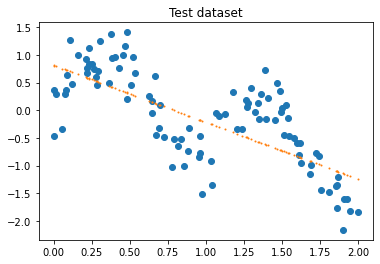

In [6]:
plt.scatter(x_test, y_test)
plt.scatter(x_test, m[0]*x_test + m[1], s=1)
plt.title("Test dataset")

### Part4:
Were the reported accuracies acceptable?

What about the line you drew in the last part?

Was it appropriate for the dataset?
<br><br/>
Explain what are the main problems here.

Since a linear regression is used, while we have a non-linear distribution, predictions lack accuracy.
According to reported, MSEs predictions for train data are better than test data.
Dataset is non-linear and linear regression seems to be insufficient.
Main problems are: Non-linear dataset with limited number of samples with high variance and implementation of a linear model.

### Part5:
Now, consider the `Locally Weighted Linear Regression` approach for this problem. Do expect it performs better than simple `Linear Regression` for this dataset?

Locally Weighted Linear Regression incorporates a weight function which can be configured in order to improve prediction accuracy by enhancing the effect of known samples in the vicinity of a query point.

### Part6:
Here, we want to implement the `suggested model`. You can implement any weight function you want, the below implementation is just a sample:
<br><br/>
\begin{equation*}
    w^{(i)}=exp\left(-\frac{(\mathbf x^{(i)}-\mathbf x)^\top(\mathbf x^{(i)}-\mathbf x)}{2\tau^2}\right)
\end{equation*}

In [7]:
def get_weight_matrix(the_query_point, train_dataset, hyperparameter):
    the_query_point=np.mat(np.reshape(the_query_point,(2,1)))
    l = train_dataset.shape[0]
    W = np.mat(np.eye(l))
    for i, xi in enumerate(train_dataset):
        xi=np.mat(np.reshape(xi,(2,1)))
        W[i, i] = np.exp(-1* ( np.dot((xi-the_query_point).T,(xi-the_query_point)) / (2*hyperparameter**2) ) )
    return W

Now implement the `closed form solution` based on the following formula:
<br><br/>
\begin{equation*}
    \boldsymbol\theta=(X^\top WX)^{-1}(X^\top WY)
\end{equation*}
<br><br/>
Of course if you use another form, implement your own.

In [8]:
def predict(train_X, train_Y, query_x, hyperparameter):
    l = train_X.shape[0]
    X = np.hstack((np.reshape(train_X,(l, 1)), np.ones((l, 1))))
    train_Y=np.reshape(train_Y,(l,1))
    qx = np.mat([query_x, 1])
    W = get_weight_matrix(qx, X, hyperparameter)
    
    theta = np.dot( np.linalg.inv(np.dot(np.dot(X.T,W),X)) ,(np.dot(np.dot(X.T,W),train_Y)))

    return np.dot(qx, theta)

### Part7:
Report accuracy of this model on the test dataset. Also, draw a plot that contains (x_test, y_test) pairs and (x_test, predicted_y) pairs that differ in color.

In [9]:
hyperparameter=0.06
predicted_test = [predict(x_train, y_train, query, hyperparameter) for query in x_test]
predicted_test=np.squeeze(np.array(predicted_test))
error = mean_squared_error(y_test,predicted_test)
print(f"MSE test error: {error}")

MSE test error: 0.09739099576698443


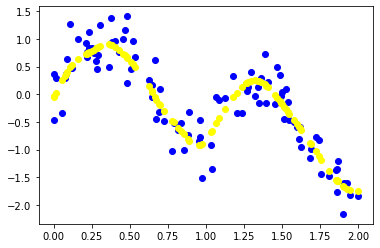

In [10]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_test, c="yellow")

### Part8:
Is the performance of the new model better than the previous one? `Explain`.

Locally Weighted Linear Regression preforms much better than Linear Regression on this non-linear dataset. Weight function of Locally Weighted Linear Regression gives a higher priority to samples in vicinity of query point and makes non-linear prediction a possibility.

### Part9:
Now, we want to consider the `KNN` approach for this problem; Do you think it will perform well?

Since KNN uses K-nearest neighboring samples to make a prediction, this approach should perform better than a linear model regarding this non-linear dataset. 

### Part10:
Implementing the `KNN model`.

In [11]:
class KNN:
    def __init__(self, number_neighbours, X, Y):
        self.k = number_neighbours
        self.X = X
        self.Y = Y

    def distance(self, x1, x2):
        distance =  np.sqrt((x1-x2)**2) # implement the distance function
        return distance

    def return_nn_ids(self, x):
        distance=self.distance(self.X,x)
        # find indices of k nearest neighbours to x
        indices=pd.DataFrame(data={'Distance': distance}).sort_values(by='Distance')[0:self.k].index.to_numpy()
        return indices

    def predict(self, x):
        neareest_indices = self.return_nn_ids(x)
        x_result=np.zeros(self.k)
        y_result=np.zeros(self.k)
        distance_result=np.zeros(self.k)
        weights_result=np.zeros(self.k)
        for i, idx in enumerate(neareest_indices):
            x_result[i]=x_train[idx]
            y_result[i]=y_train[idx]
            distance_result[i]=np.sqrt((x_result[i]-x)**2)
            weights_result[i]=1/max(distance_result[i],10**-300)
        weights_result=weights_result/weights_result.sum()
        #predicted_y = sum(weights_result * y_result)
        predicted_y = y_result.mean()
        return predicted_y

In [12]:
def evaluation(k, x_train, y_train, x_test, y_test):
    model = KNN(k, x_train, y_train)
    predicted_y = [model.predict(x) for x in x_test]
    error = mean_squared_error(y_test,predicted_y)
    return error, predicted_y

In [16]:
k = 31
error_knn=np.ones(5)
#-------------------fold #1--------------------------------
error_knn[0], predicted_y = evaluation(k, x_train, y_train, x_test, y_test)
print(f"MSE error of KNN for test dataset (fold #1): {error_knn[0]}")
#-------------------fold #2--------------------------------
# Splitting data into train and test part. 80% for train and 20% for test
train = dataset[(dataset[:,0]%5)!=1]
test = dataset[(dataset[:,0]%5)==1]

x_train = train[:,1]
y_train = train[:,2]

x_test = test[:,1]
y_test = test[:,2]

error_knn[1], predicted_y = evaluation(k, x_train, y_train, x_test, y_test)
print(f"MSE error of KNN for test dataset (fold #2): {error_knn[1]}")
#-------------------fold #3--------------------------------
# Splitting data into train and test part. 80% for train and 20% for test
train = dataset[(dataset[:,0]%5)!=2]
test = dataset[(dataset[:,0]%5)==2]

x_train = train[:,1]
y_train = train[:,2]

x_test = test[:,1]
y_test = test[:,2]

error_knn[2], predicted_y = evaluation(k, x_train, y_train, x_test, y_test)
print(f"MSE error of KNN for test dataset (fold #3): {error_knn[2]}")
#-------------------fold #4--------------------------------
# Splitting data into train and test part. 80% for train and 20% for test
train = dataset[(dataset[:,0]%5)!=3]
test = dataset[(dataset[:,0]%5)==3]

x_train = train[:,1]
y_train = train[:,2]

x_test = test[:,1]
y_test = test[:,2]

error_knn[3], predicted_y = evaluation(k, x_train, y_train, x_test, y_test)
print(f"MSE error of KNN for test dataset (fold #4): {error_knn[3]}")
#-------------------fold #5--------------------------------
# Splitting data into train and test part. 80% for train and 20% for test
train = dataset[(dataset[:,0]%5)!=4]
test = dataset[(dataset[:,0]%5)==4]

x_train = train[:,1]
y_train = train[:,2]

x_test = test[:,1]
y_test = test[:,2]

error_knn[4], predicted_y = evaluation(k, x_train, y_train, x_test, y_test)
print(f"MSE error of KNN for test dataset (fold #5): {error_knn[4]}")
print(f"Average MSE (Cross-validation): {error_knn.mean()}")

MSE error of KNN for test dataset (fold #1): 0.08319190043600276
MSE error of KNN for test dataset (fold #2): 0.11060962301470517
MSE error of KNN for test dataset (fold #3): 0.08268715601876941
MSE error of KNN for test dataset (fold #4): 0.08909925630686236
MSE error of KNN for test dataset (fold #5): 0.08319190043600276
Average MSE (Cross-validation): 0.08975596724246851


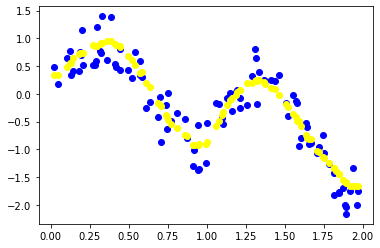

In [17]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_y, c="yellow")

To find best K for this algorithm we suggest to use cross-validation.
<br><br/>
Did this model perform well (due to the plot and test accuracy)?

According to numerous test results using cross-validation, best achieved "average MSE" was for "K=31" (average MSE=0.08975) and best single fold achieved "MSE" was attained by "K=35" (MSE of fold#3=0.08228). Also, for "K=8" average MSE was 0.09393 and MSE of fold#5 was 0.08742. By changing parameter of KNN regression, its accuracy may improve and the plot confirms that the model is working. However, predictions for x around 2 could be better.